In [1]:
# Use the same model on the dataset2

import pandas as pd
import numpy as np

df =pd.read_csv('data/data2.csv', index_col=[0])
df

,Course_Group,Mode_Group,pre_q_group,ord_group,Mq_Group,Fq_Group,Mo_Group,Fo_Group,Previous qualification (grade),Admission grade,...,Marital status,Daytime/evening attendance\t,Tuition fees up to date,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),notpass_1,notpass_2,Target
0,Mid1,Mid,1,0.0,Mid,Mid,Mid2,Mid2,122.0,127.3,...,1,1,1,0,0.000000,0,0.000000,0,0,Dropout
1,Mid1,High,1,0.0,Mid,Mid,Mid2,Mid2,160.0,142.5,...,1,1,0,6,14.000000,6,13.666667,0,0,Graduate
2,Mid2,High,1,0.0,Mid,Mid,Mid2,Mid2,122.0,124.8,...,1,1,0,0,0.000000,0,0.000000,6,6,Dropout
3,Mid2,Mid,1,0.0,High,Mid,Mid2,Mid2,122.0,119.6,...,1,1,1,6,13.428571,5,12.400000,0,1,Graduate
4,Mid2,Low,1,0.0,Mid,High,Mid2,Mid2,100.0,141.5,...,2,0,1,5,12.333333,6,13.000000,1,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Mid2,High,1,0.0,Mid,Mid,Mid2,Mid1,125.0,122.2,...,1,1,1,5,13.600000,5,12.666667,1,1,Graduate
4420,Mid2,High,1,0.0,Mid,Mid,Mid2,Mid2,120.0,119.0,...,1,1,0,6,12.000000,2,11.000000,0,4,Dropout
4421,High,High,1,0.0,Mid,Mid,Mid2,Mid2,154.0,149.5,...,1,1,1,7,14.912500,1,13.500000,0,7,Dropout
4422,Mid1,High,1,0.0,Mid,Mid,Mid2,Mid1,180.0,153.8,...,1,1,1,5,13.800000,5,12.000000,0,0,Graduate


In [2]:
df.columns

Index(['Course_Group', 'Mode_Group', 'pre_q_group', 'ord_group', 'Mq_Group',
       'Fq_Group', 'Mo_Group', 'Fo_Group', 'Previous qualification (grade)',
       'Admission grade', 'Displaced', 'Debtor', 'Gender',
       'Scholarship holder', 'Age at enrollment', 'Marital status',
       'Daytime/evening attendance\t', 'Tuition fees up to date',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'notpass_1', 'notpass_2', 'Target'],
      dtype='object')

In [3]:
# Logistic model again on the second dataset, check the student after 2 semesters of study

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

categorical_cols = ['Course_Group', 'Mode_Group', 'pre_q_group', 'ord_group', 'Mq_Group',
       'Fq_Group', 'Mo_Group', 'Fo_Group',  'Displaced', 'Debtor', 'Gender',
       'Scholarship holder',  'Marital status','Daytime/evening attendance\t']
numeric_cols = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)', 'notpass_1', 'notpass_2']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Course_Group', 'Mode_Group',
                                                   'pre_q_group', 'ord_group',
                                                   'Mq_Group', 'Fq_Group',
                                                   'Mo_Group', 'Fo_Group',
                                                   'Displaced', 'Debtor',
                                                   'Gender',
                                                   'Scholarship holder',
                                                   'Marital status',
                                                   'Daytime/evening '
                                                   'attendance\t']),
                                                 ('num', StandardScaler(),
                                                  ['Previous qualification '
                                                   '(grade)',
                                                   'Admission grade',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'notpass_1',
                                                   'notpass_2'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [6]:
# Much better model performance with the addition of the data of the 1st and 2nd semester study.

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)


y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9104683195592287
Precision: 0.9119323325425157
Recall: 0.9104683195592287
F1 Score: 0.9094007286815486

Confusion Matrix:
[[236  48]
 [ 17 425]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.93      0.83      0.88       284
    Graduate       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [7]:
# Hyperparameter tuning of the model

from sklearn.model_selection import GridSearchCV

# Same preprocessor from earlier
clf2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=3000))
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(
    clf2,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best params: {'model__C': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best CV score: 0.9067722410674296


In [8]:
# Almost the same result after tuning

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[237  47]
 [ 17 425]]
              precision    recall  f1-score   support

     Dropout       0.93      0.83      0.88       284
    Graduate       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



In [10]:
# Apply the lightgbm model

import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(
    objective="binary",      # or multiclass if using 3 categories
    learning_rate=0.05,
    n_estimators=500,
    max_depth=-1,
    num_leaves=31,
    random_state=42,
)

In [11]:
X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()


for col in categorical_cols:
    X_train_lgb[col] = X_train_lgb[col].astype("category")
    X_test_lgb[col] = X_test_lgb[col].astype("category")

In [12]:
lgbm_model.fit(
    X_train_lgb,
    y_train,
    categorical_feature=categorical_cols,
    eval_set=[(X_test_lgb, y_test)],
    eval_metric="logloss",
   )

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1767, number of negative: 1137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 2904, number of used features: 24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.608471 -> initscore=0.440890
[LightGBM] [Info] Start training from score 0.440890


LGBMClassifier(learning_rate=0.05, n_estimators=500, objective='binary',
               random_state=42)

In [13]:
# Aslo very good performance, similar to logistic model

y_pred = lgbm_model.predict(X_test_lgb)
y_prob = lgbm_model.predict_proba(X_test_lgb)[:, 1]   # probability of class 1

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9090909090909091
Precision: 0.911012987012987
Recall: 0.9090909090909091
F1 Score: 0.9078803011387281

Confusion Matrix:
[[234  50]
 [ 16 426]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.94      0.82      0.88       284
    Graduate       0.89      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



In [15]:
import optuna
import warnings
from sklearn.model_selection import cross_val_score

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Suppress Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'f1',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0)
    }
    
    model = lgb.LGBMClassifier(**param)
    score = cross_val_score(model, X_train_lgb, y_train, cv=5, scoring='f1_weighted').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best CV score:", study.best_value)


Best params: {'num_leaves': 35, 'max_depth': 5, 'learning_rate': 0.0597947970252138, 'min_data_in_leaf': 46, 'feature_fraction': 0.8903139066460495, 'bagging_fraction': 0.8191692221913636, 'bagging_freq': 6, 'lambda_l1': 0.0009599070599088383, 'lambda_l2': 9.086464432161306e-05}
Best CV score: 0.9141207331737371


In [16]:
lgbm_model = lgb.LGBMClassifier(
    objective="binary",      # or multiclass if using 3 categories
    learning_rate=0.082,
    n_estimators=500,
    max_depth=4,
    num_leaves=111,
    random_state=42,
    min_data_in_leaf=96,
    feature_fraction=0.844,
    bagging_fraction=0.6384,
    bagging_freq=4,
    lambda_l1=0.00024634,
    lambda_l2=7.46157289135056e-07
)

In [17]:
lgbm_model.fit(
    X_train_lgb,
    y_train,
    categorical_feature=categorical_cols,
    eval_set=[(X_test_lgb, y_test)],
    eval_metric="logloss",
   )

LGBMClassifier(bagging_fraction=0.6384, bagging_freq=4, feature_fraction=0.844,
               lambda_l1=0.00024634, lambda_l2=7.46157289135056e-07,
               learning_rate=0.082, max_depth=4, min_data_in_leaf=96,
               n_estimators=500, num_leaves=111, objective='binary',
               random_state=42)

In [18]:
# Almost same result after model tuning

y_pred = lgbm_model.predict(X_test_lgb)
y_prob = lgbm_model.predict_proba(X_test_lgb)[:, 1]   # probability of class 1

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9090909090909091
Precision: 0.9103648253521469
Recall: 0.9090909090909091
F1 Score: 0.9080482125148732

Confusion Matrix:
[[236  48]
 [ 18 424]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.93      0.83      0.88       284
    Graduate       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [19]:
# try the catboost model

from catboost import CatBoostClassifier, Pool

for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_cols)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_cols)

In [20]:
model = CatBoostClassifier(
    iterations=500,       # number of trees
    learning_rate=0.05,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    verbose=100           # prints progress every 100 iterations
)

# Train
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

0:	learn: 0.9189479	test: 0.9174705	best: 0.9174705 (0)	total: 188ms	remaining: 1m 34s
100:	learn: 0.9476282	test: 0.9327549	best: 0.9350649 (80)	total: 2.94s	remaining: 11.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9350649351
bestIteration = 80

Shrink model to first 81 iterations.


In [21]:
# Good performance, but almost same as the logistic model

y_pred = model.predict(test_pool)
y_prob = model.predict_proba(test_pool)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9173553719008265
Precision: 0.9208127180868676
Recall: 0.9173553719008265
F1 Score: 0.916013738327788

Confusion Matrix:
[[234  50]
 [ 10 432]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.96      0.82      0.89       284
    Graduate       0.90      0.98      0.94       442

    accuracy                           0.92       726
   macro avg       0.93      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



In [22]:
# Since all the models have almost same performance, I chooose the most simple one: logistic regression.
# Next step I would like to see the feature importances and if I can reduce the features


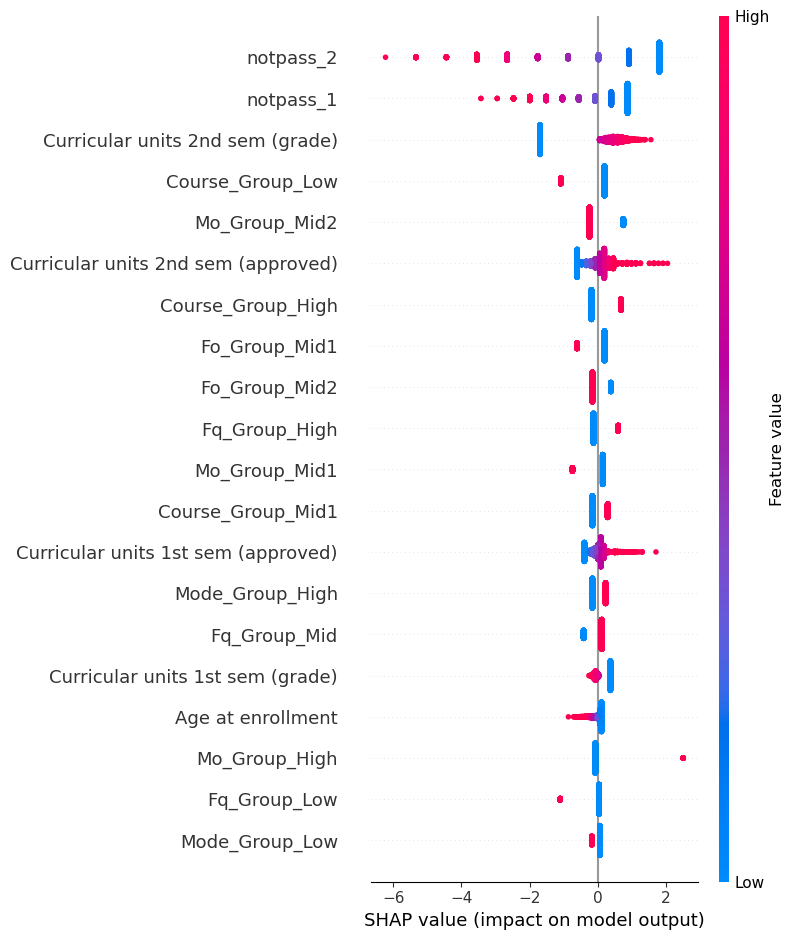

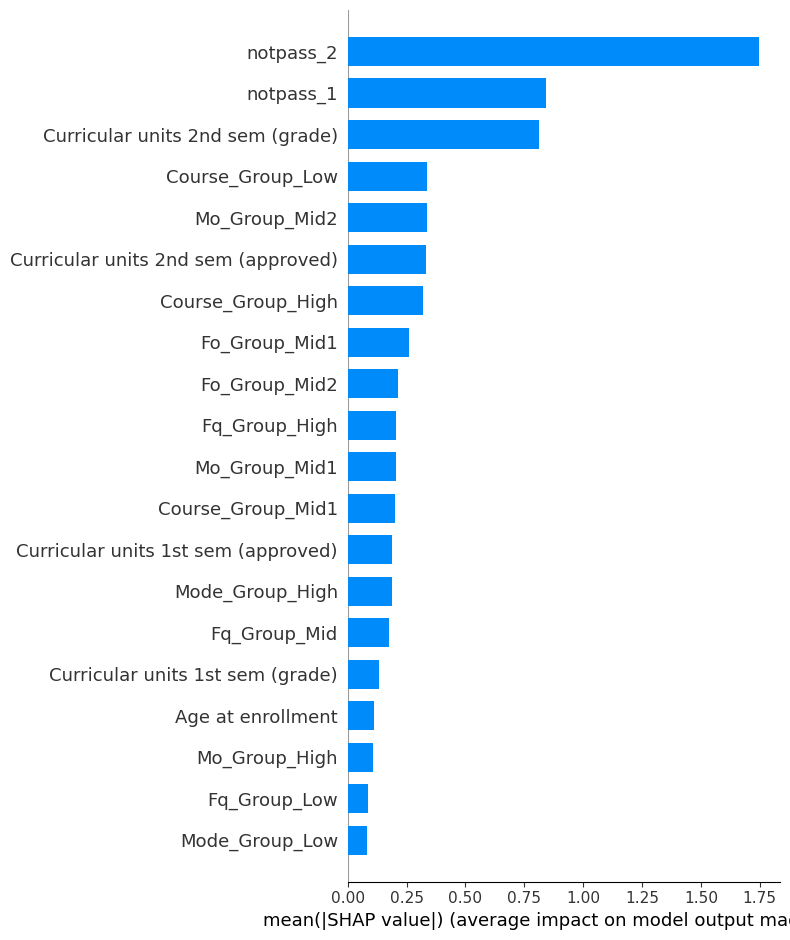

In [23]:
# Check the feature importance of the prediction model

import shap

ohe = preprocessor.named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_cols)

# Combine with numeric features
feature_names = list(ohe_features) + numeric_cols

X_train_t = best_model.named_steps['preprocessor'].transform(X_train)

# linear explainer for logistic regression
explainer = shap.LinearExplainer(
    best_model.named_steps['model'],
    X_train_t
)

shap_values = explainer.shap_values(X_train_t)
if isinstance(shap_values, list):  
    shap_matrix = shap_values[1]     # select positive class
else:
    shap_matrix = shap_values

if len(shap_matrix.shape) == 1:
    shap_matrix = shap_matrix.reshape(-1, 1)


shap.summary_plot(shap_matrix , X_train_t, feature_names=feature_names)
shap.summary_plot(shap_matrix , X_train_t,
                  feature_names=feature_names,
                  plot_type='bar')

In [24]:
# Only choose the features have the most importance

categorical_cols = ['Course_Group', 'Mo_Group', 'Fo_Group',   'Debtor', 'Scholarship holder' ]
numeric_cols = [ 'Curricular units 1st sem (approved)', 'Age at enrollment', 'Curricular units 1st sem (grade)',
                'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)', 'notpass_1', 'notpass_2']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

clf3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [25]:
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9104683195592287
Precision: 0.9116346887933113
Recall: 0.9104683195592287
F1 Score: 0.909481683923015

Confusion Matrix:
[[237  47]
 [ 18 424]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.93      0.83      0.88       284
    Graduate       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



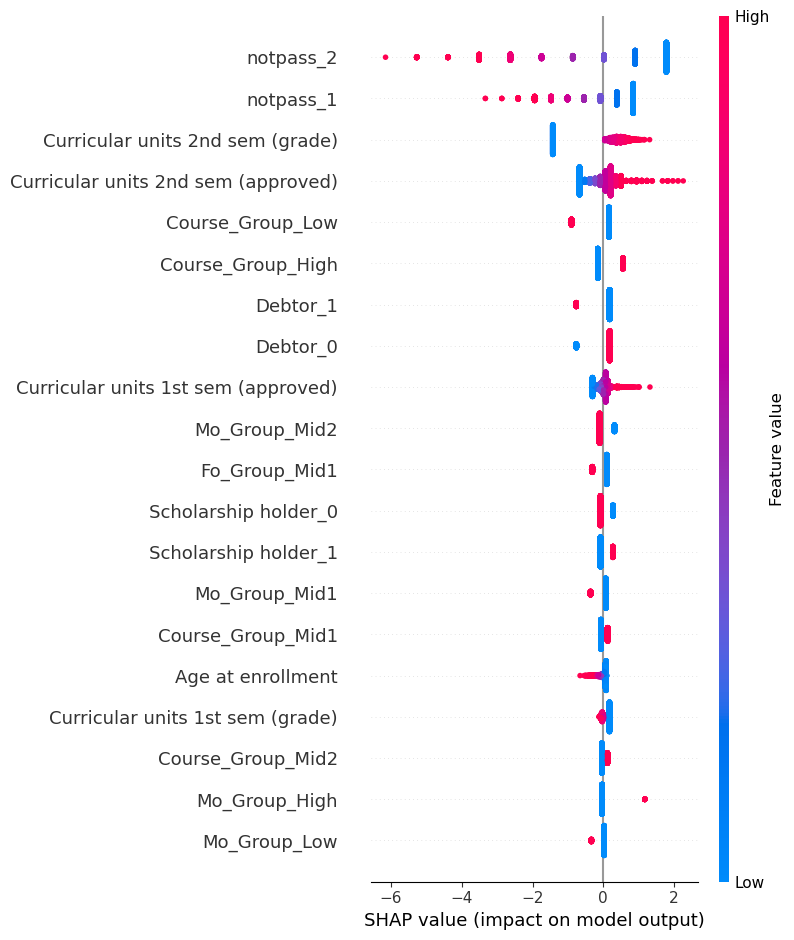

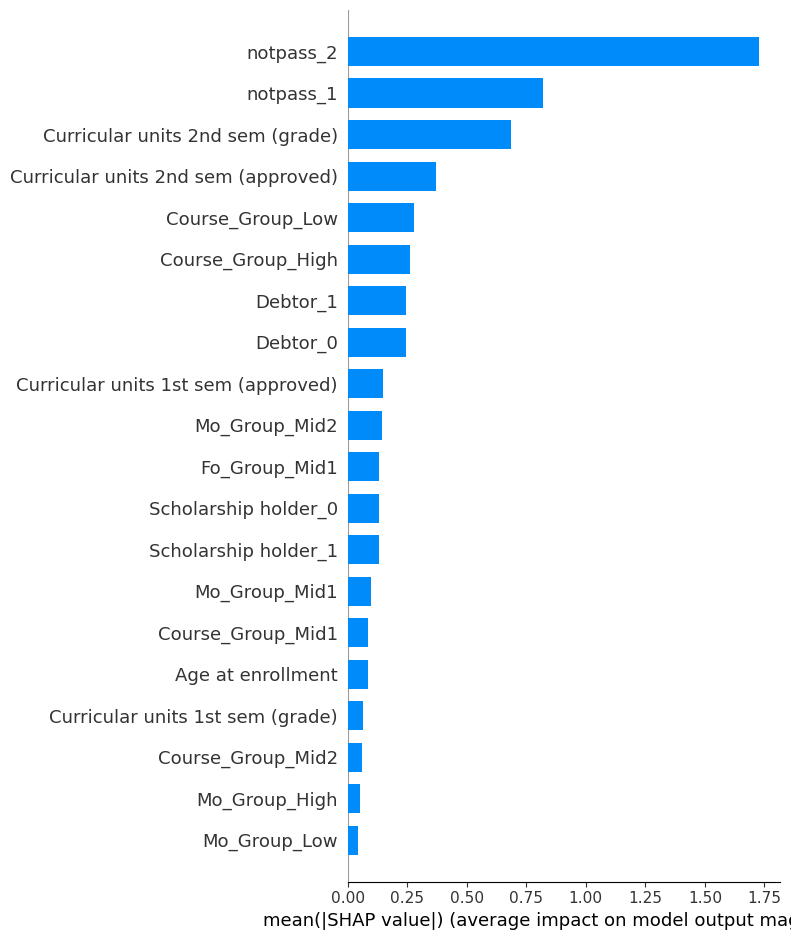

In [26]:
# Finally Check the feature importance again

X_train_transformed = clf3.named_steps['preprocessor'].transform(X_train)

log_reg = clf3.named_steps['model']

explainer = shap.LinearExplainer(log_reg, X_train_transformed)

shap_values = explainer.shap_values(X_train_transformed)

ohe = clf3.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_cols)

feature_names = list(ohe_features) + numeric_cols

shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)
shap.summary_plot(shap_values, X_train_transformed,
                  feature_names=feature_names,
                  plot_type='bar')

# Conculsions:

1. From the model1 (did not use the 1st and 2nd semester data) and model2 (used the 1st and 2nd semester data), We can see that the most important features to see if the student will succeed academically at the beginning are the courses selected, application mode and admission scores. The Previous qualification (grade) is a redundant feature to the admission score. We can get a 0.75 accuracy of prediction, because it is still early and many things can change.

2. With the data from the academic performance of the first year of study, the prediction model has a much better accuracy (>0.9), we can see the most important features are the courses they did not pass in the first and second semester, and the grades they received.

3. This model can help the education institutions to find the students who most likely graduate or drop out. They can adjust the education policy to provide the help to the students who are really in need. 


